🔍 Paraphrase Detection - Enter your two sentences
Enter Sentence 1: hello
Enter Sentence 2: hii

================= Result =================
🔗 Similarity Score: 0.64
❌ These sentences are DIFFERENT.


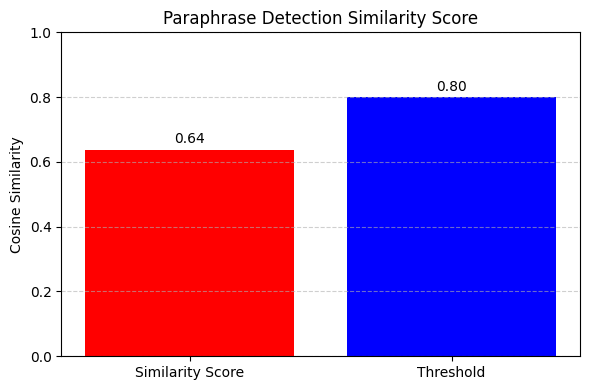

In [ ]:
#Text Similarity and Paraphrase Detection
# Install required packages
!pip install -q sentence-transformers scikit-learn
import matplotlib.pyplot as plth
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Take input from the user
print("🔍 Paraphrase Detection - Enter your two sentences")
sentence1 = input("Enter Sentence 1: ")
sentence2 = input("Enter Sentence 2: ")

# Encode the sentences into embeddings
embeddings = model.encode([sentence1, sentence2])
similarity_score = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

# Define threshold for paraphrase detection
threshold = 0.8
is_duplicate = similarity_score >= threshold

# Print results
print("\n================= Result =================")
print(f"🔗 Similarity Score: {similarity_score:.2f}")
if is_duplicate:
    print("✅ These sentences are likely PARAPHRASED or DUPLICATES.")
else:
    print("❌ These sentences are DIFFERENT.")
print("==========================================")
# ======= Graph Output ========
labels = ['Similarity Score', 'Threshold']
values = [similarity_score, threshold]
colors = ['green' if similarity_score >= threshold else 'red', 'blue']

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors)
plt.ylim(0, 1.0)
plt.title("Paraphrase Detection Similarity Score")
plt.ylabel("Cosine Similarity")
plt.text(0, similarity_score + 0.02, f"{similarity_score:.2f}", ha='center')
plt.text(1, threshold + 0.02, f"{threshold:.2f}", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator

translator = Translator()

text = input("Enter English text to translate: ")
lang = input("Enter target language (e.g., Hindi, Bengali, Tamil): ").strip().lower()

# Map full language names to googletrans language codes
lang_map = {
    "hindi": "hi",
    "bengali": "bn",
    "kannada": "kn",
    "malayalam": "ml",
    "marathi": "mr",
    "odia": "or",
    "punjabi": "pa",
    "tamil": "ta",
    "telugu": "te",
    "urdu": "ur",
    "english": "en"
}

if lang not in lang_map:
    print(f"Language '{lang}' not supported.")
else:
    tgt_code = lang_map[lang]
    translated = translator.translate(text, dest=tgt_code)
    print("Translated text:")
    print(translated.text)

Enter English text to translate: hello
Enter target language (e.g., Hindi, Bengali, Tamil): hindi
Translated text:
नमस्ते


In [ ]:
!pip install -U langchain langchain-huggingface transformers

In [ ]:
from transformers import pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain.memory import ConversationBufferMemory
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.runnables import Runnable

# Setup chat model (BlenderBot)
chat_pipeline = pipeline("text2text-generation", model="facebook/blenderbot-400M-distill", device=-1)

# Wrap in LangChain
llm = HuggingFacePipeline(pipeline=chat_pipeline)

# Create memory
memory = ConversationBufferMemory(return_messages=True)

# Chat prompt with memory
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful medical assistant. Provide helpful advice without diagnosing directly."),
    MessagesPlaceholder(variable_name="history"),
    ("human", "{input}")
])

# Runnable chain (LangChain 1.0+ style)
chain = prompt | llm

print("🤖 Medical Assistant is ready. Type 'exit' to quit.\n")

while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        break

    # History from memory
    history = memory.chat_memory.messages

    # Get response
    response = chain.invoke({"input": user_input, "history": history})

    print("Assistant:", response)

    # Update memory
    memory.chat_memory.add_user_message(user_input)
    memory.chat_memory.add_ai_message(response)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/730M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/730M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/62.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/310k [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-2-3f89670b21d5>:14: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(return_messages=True)


🤖 Medical Assistant is ready. Type 'exit' to quit.

You: i have headache
Assistant:  I'm sorry to hear that. Have you tried anything to help with the headache? 
You: no not yet
Assistant:  Well, I hope you feel better soon. I know headaches can be debilitating.
You: okay
Assistant:  Do you have headaches often? I get them sometimes when I'm stressed out. 
You: exit


In [ ]:
!pip install pydantic

In [ ]:
from pydantic import BaseModel, validator, ValidationError
from datetime import datetime
from typing import Optional,List

class DataRecord(BaseModel):
    id: int
    name: str
    amount: float
    transaction_date: datetime
    status: Optional[str] = None  # Optional field

    @validator('name')
    def name_must_not_be_empty(cls, v):
        if not v.strip():
            raise ValueError("Name cannot be empty")
        return v

    @validator('status')
    def status_must_be_valid(cls, v):
        allowed = {'pending', 'completed', 'failed'}
        if v is not None and v.lower() not in allowed:
            raise ValueError(f"Status must be one of {allowed}")
        return v


<ipython-input-4-74e6e51d4906>:12: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('name')
<ipython-input-4-74e6e51d4906>:18: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('status')


In [ ]:
# Sample data, with a few intentionally invalid entries
raw_data: List[dict] = [
    {"id": "1", "name": "Alice",   "amount": "123.45", "transaction_date": "2024-05-01", "status": "completed"},
    {"id": "2", "name": "   ",     "amount": "50.0",   "transaction_date": "2024-05-02", "status": "pending"},
    {"id": "3", "name": "Bob",     "amount": "invalid", "transaction_date": "2024-05-03", "status": "completed"},
    {"id": "4", "name": "Charlie", "amount": "75.00",  "transaction_date": "not-a-date",   "status": "error"},
    {"id": "5", "name": "Dana",    "amount": "100",    "transaction_date": "2024-05-05"}  # status is optional
]


In [ ]:
#Creates with dataobject for storing valid ones and rejecting with errors
valid_records = []
errors = []

for record in raw_data:
    try:
        validated = DataRecord(**record)
        valid_records.append(validated.dict())
    except ValidationError as e:
        errors.append({"record": record, "errors": e.errors()})

<ipython-input-6-ef44eba4f75c>:8: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  valid_records.append(validated.dict())


In [ ]:
#Tables cretaed for both valid records and validation errors
from IPython.display import display
import pandas as pd

df_valid = pd.DataFrame(valid_records)
df_errors = pd.DataFrame(errors)


print("✅ Valid Records")
display(df_valid)

print("\n❌ Validation Errors")
display(df_errors)


✅ Valid Records


,id,name,amount,transaction_date,status
0,1,Alice,123.45,2024-05-01,completed
1,5,Dana,100.00,2024-05-05,None



❌ Validation Errors


,record,errors
0,"{'id': '2', 'name': ' ', 'amount': '50.0', '...","[{'type': 'value_error', 'loc': ('name',), 'ms..."
1,"{'id': '3', 'name': 'Bob', 'amount': 'invalid'...","[{'type': 'float_parsing', 'loc': ('amount',),..."
2,"{'id': '4', 'name': 'Charlie', 'amount': '75.0...","[{'type': 'datetime_from_date_parsing', 'loc':..."
